In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import empyrical
from scipy import stats
from WindPy import w
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
FOF_DIR = 'D:/workspace/data/FOF'
COMP_RET_FILE = '%s/comp_ret.xlsx'%(FOF_DIR)

In [4]:
def up_down(returns, risk_free=0.0, required_return=0.0, annualization=252):
    if len(returns) < 2:
        return np.nan

    if annualization == 1:
        return_threshold = required_return
    elif required_return <= -1:
        return np.nan
    else:
        return_threshold = (1 + required_return) ** \
            (1. / annualization) - 1

    returns_less_thresh = returns - risk_free - return_threshold

    numer = sum(returns_less_thresh[returns_less_thresh > 0.0])
    denom = -1.0 * sum(returns_less_thresh[returns_less_thresh < 0.0])
    return numer, denom

In [105]:
# df = pd.read_pickle('%s/stock_return.pkl'%(FOF_DIR))
# df = pd.read_excel(COMP_RET_FILE)
df = pd.read_excel(u'./债基数据.xlsx', index_col=0)

In [106]:
df.index = pd.to_datetime(df.index, format='%Y%m%d')

In [107]:
df = (df + 1).pct_change().dropna()

In [108]:
cols = [col for col in df.columns if col.endswith(u'一级')]

In [109]:
df = df[cols]

In [110]:
mdf = df.resample('M').apply(lambda x: empyrical.cum_returns_final(x))

In [111]:
omega = pd.DataFrame(index=mdf.columns, columns=['omega', 'upside', 'downside', 'ret', 'vol'])
for col in mdf.columns:
    ret = mdf[col]
#     ret = df[col].dropna().copy().replace([np.inf], 0)
    up, down = up_down(ret)
    omega.loc[col, 'omega'] = empyrical.omega_ratio(ret, annualization=12)
    omega.loc[col, 'upside'] = up
    omega.loc[col, 'downside'] = down
    omega.loc[col, 'ret'] = empyrical.annual_return(ret, period='monthly')
    omega.loc[col, 'vol'] = empyrical.annual_volatility(ret, period='monthly')
#     omega.loc[col, 'ret'] = ret.mean()
#     omega.loc[col, 'vol'] = ret.var()
    omega.loc[col, 'sharpe'] = empyrical.sharpe_ratio(ret, period='monthly')

In [112]:
# omega = omega.dropna()

In [113]:
omega.sort_values('downside', ascending=False)

,omega,upside,downside,ret,vol,sharpe
招商基金一级,1.94173,0.660695,0.340261,0.0571471,0.093082,0.645467
工银瑞信基金一级,1.9959,0.561288,0.281221,0.0519789,0.0594508,0.883295
国联安基金一级,1.89199,0.382363,0.202096,0.033333,0.0443328,0.762418
广发基金一级,2.67946,0.490528,0.18307,0.0579857,0.0485772,1.186739
交银施罗德基金一级,2.39968,0.428049,0.178378,0.046975,0.0408716,1.145379
富国基金一级,2.63234,0.425915,0.161801,0.0498622,0.0394892,1.254052
中银基金一级,2.7069,0.436404,0.161219,0.0521143,0.0374387,1.378174
华安基金一级,3.71254,0.563141,0.151686,0.0781787,0.0584385,1.320154
国投瑞银基金一级,3.43643,0.493853,0.143711,0.0666711,0.0438596,1.496861
易方达基金一级,3.80935,0.546752,0.143529,0.0770258,0.0492169,1.536146


In [85]:
# data = w.wss(','.join(omega.index.tolist()), 'sec_name')
# omega['name'] = data.Data[0]
# omega.sort_values('sharpe', ascending=False)

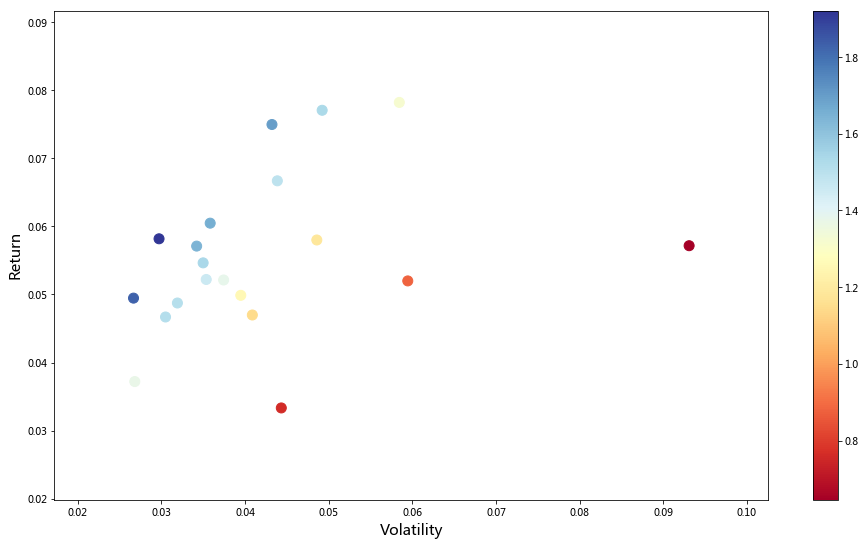

In [86]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.scatter(omega['vol'], omega['ret'], c=omega['sharpe'], cmap='RdYlBu', s=100)
plt.ylabel(u'Return', size=15)
plt.xlabel(u'Volatility', size=15)
plt.colorbar()

Text(0.5,1,u'\u4e00\u7ea7\u503a\u57fa')

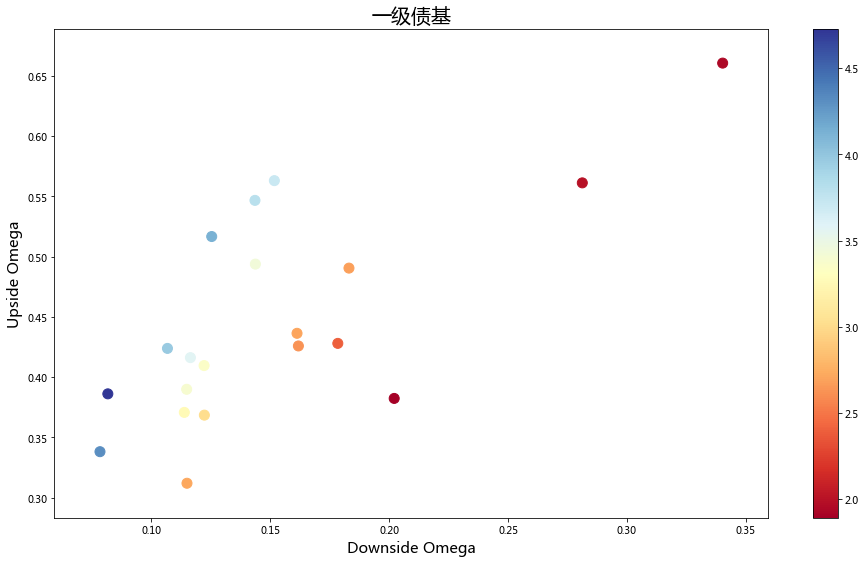

In [88]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.ylabel(u'Upside Omega', size=15)
plt.xlabel(u'Downside Omega', size=15)
plt.scatter(omega['downside'], omega['upside'], c=omega['omega'], cmap='RdYlBu', s=100)
plt.colorbar()
plt.title(u'一级债基', fontsize=20)